In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [12, 9]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Quiz 5 this week. 
    - Directional derivatives
    - 3 properties of $\nabla f$
  - Homework 7 due Tuesday
    

# One-minute Review

  - Local mins and maxes occur at critical points (usually where $\nabla f = \vec 0$).
  - Critical points with no local extrema are saddle points
  - 2nd Derivative Test: $$D = \begin{vmatrix} f_{xx} & f_{xy} \\ f_{xy} & f_{yy} \end{vmatrix}_{(a,b)}$$

Then, 
  - if $D>0$ and $f_{xx} < 0$, $f(a,b)$ is a local maximum.
  - if $D>0$ and $f_{xx} > 0$, $f(a,b)$ is a local minimum.
  - if $D<0$, $(a,b)$ is a saddle point. 

Otherwise, the test is inconclusive.

## Definitions 

A set $S$ is **open** if all points are interior points.

A set $S$ is **closed** if it contains all its boundary points.

![Closed and open sets in the plane](clopen.png)

# Lecture 13

  - Objectives
    - Identify open and closed sets
    - Solve unconstrained optimization problems
    - Solve constrained optimization problems (Lagrange Multipliers)
    
    
  - Resources
    - Content
      - Stewart: §14.8
      - New Strang: [§4.8](https://openstax.org/books/calculus-volume-3/pages/4-8-lagrange-multipliers)
      - [Slides](https://e2000.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-sp20&urlpath=tree%2Fmvc-sp20%2Fslide_notebooks%2Fmvc-L13.ipynb) via JupyterHub
    - Practice
      - Mooculus: {Constrained Optimization](https://ximera.osu.edu/mooculus/calculus3/constrainedOptimization/digInConstrainedOptimization) [Lagrange Multipliers](https://ximera.osu.edu/mooculus/calculus3/lagrangeMultipliers/digInLagrangeMultipliers)
    - Extras
      - CalcBLUE: [Optimization](https://www.youtube.com/watch?v=CBWMHf1MfEs&list=PL8erL0pXF3JZZTnqjginERYYEi1WpLE_V&index=110) 

# Optimization


### Theorem (Fermat, I guess)

If a local maximum or minimum of a function $f:D\to \RR$ occurs at an interior point $\vec p$, then $\vec p$ is a critical point of $f$. 

## Interpretation - Unconstrained optimization

On an open domain, look only at critical points for maxima and minima.

## First Example - Unconstrained optimization.

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

In [3]:
@interact
def _(angle=(-120,30,6)):
    fig= plt.figure(figsize=(8,8),dpi=100)
    ax = fig.add_subplot(111,projection='3d')
    x = y = np.linspace(-3/2,3/2,100)
    x,y = np.meshgrid(x,y)
    ax.view_init(30,angle)
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.plot_surface(x,y,x - 2*y + 3,alpha=.5,cmap="ocean")
    ax.set_zlim3d([0,4])
    ax.plot([0,-1/2],[0,1],[0,1/2])
    ax.plot([0,0],[0,0],[0,4],'k')
    ax.plot([0,0],[-2,2],[0,0],'k')
    ax.plot([-2,2],[0,0],[0,0],'k');

interactive(children=(IntSlider(value=-48, description='angle', max=30, min=-120, step=6), Output()), _dom_cla…

# Constrained Optimization - Lagrange Multipliers

Below is the contour plot of a function $f$ and a path (in red). Visually find the point on the path with the greatest and least values of $f$  

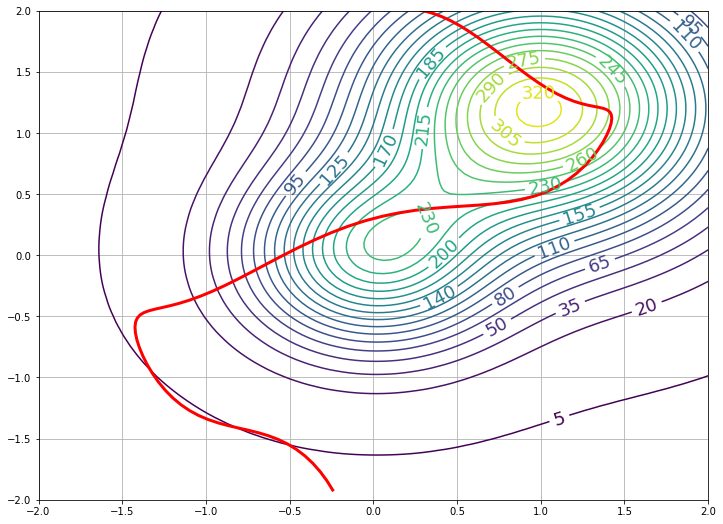

In [34]:
x = y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)
plt.grid(True)
cp = plt.contour(X,Y,4+200*exp(-2*(X**2+Y**2)) + 320*exp(-1*((X-1)**2+(Y-1.2)**2)),levels=np.arange(5,350,15))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(x/2+sin(2*x),.2+.9*x + .1*cos(7*x) - (np.abs(x) - x)**2/48,'-r',lw=3)
plt.ylim((-2,2));

## Theorem (Lagrange Multipliers

If $f(a,b)$ is a local extremum of $f$ _subject to the constraint_ $g(x,y) = c$ and $\nabla g(a,b) \neq \mathbf 0$, then there exists a scalar $\lambfda$ such that $$\nabla f = \lambda \nabla g.$$

In [51]:
@interact(t=(-2.,2,.05))
def _(t=-2,f=fixed(lambda X,Y: 4+200*exp(-2*(X**2+Y**2)) + 320*exp(-1*((X-1)**2+(Y-1.2)**2))),h=fixed(.1)):
    x = y = np.linspace(-2,2,100)
    X,Y = np.meshgrid(x,y)
    plt.grid(True)
    cp = plt.contour(X,Y,f(X,Y),levels=np.arange(5,350,15))
    plt.clabel(cp,fmt = "%d",fontsize=18);
    rx = lambda x: x/2+sin(2*x)
    ry= lambda x: .2+.9*x + .1*cos(7*x) - (np.abs(x) - x)**2/48
    plt.plot(rx(x),ry(x),'-r',lw=3)
    gfx,gfy = ( (f(rx(t)+h,ry(t)) - f(rx(t),ry(t)))/h,(f(rx(t),ry(t)+h) - f(rx(t),ry(t)))/h) 
    plt.quiver([rx(t),rx(t)],[ry(t),ry(t)],[gfx/100,(ry(t+h)-ry(t-h))/(2*h)],[gfy/100,(rx(t+h)-rx(t-h))/(-2*h)],color=['b','r'])
    plt.ylim((-2,2));

interactive(children=(FloatSlider(value=-2.0, description='t', max=2.0, min=-2.0, step=0.05), Output()), _dom_…

### Example - Constrained optimization.

  Find the point on the plane $z = x -2y + 3$ closest to the origin.
  

### Example

Find the minimum surface area of a lidless shoebox with volume $32 \text{ L}$. 

### Extreme Value Theorem

If $D\in \RR^n$ is closed and bounded and $f:D\to \RR$ is continuous, then there is an $\vec x \in D$ such that $f(\vec x)$ is the **global maximum**. That is, $f(\vec y) \leq f(\vec x)$.  

The same holds for the global minimum, mutatis mutandis. 

## Consequences

When trying to find the absolute extrema of a function $f$ on a set $D$, 
  - Find all critical points of $f$ in $D$ (unconstrained optimization). 
  - Find the extremes on the boundary of $D$.

### Example 

Suppose the temperature distribution on the closed half-disk $0 \leq y \leq \sqrt{16-x^2}$ is given by

$$u(x,y) = x^2 - 6x + 4y^2 - 8y. $$

Find the hottest and coldest points.  

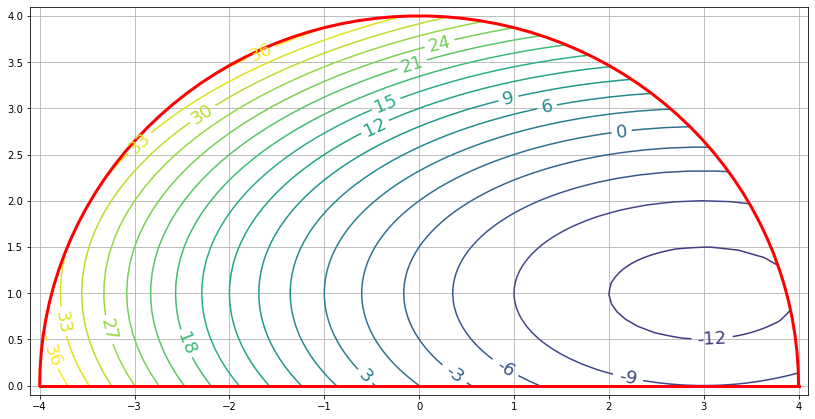

In [75]:
def u(x,y):
    return x**2 - 6*x + (4*y**2 - 8*y)
plt.figure(figsize=np.array((8.2,4.2))*1.7)
r = np.linspace(0,4,70)
th = np.linspace(0,np.pi,70)
R,T = np.meshgrid(r,th)
plt.grid(True)
cp = plt.contour(R*cos(T),R*sin(T),u(R*cos(T),R*sin(T)) ,levels=np.arange(-21,39,3))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(4*cos(th),4*sin(th),'-r',lw=3)
plt.plot(4*cos(th),np.zeros_like(th),'-r',lw=3)
plt.xlim((-4.10,4.1));
plt.ylim((-.10,4.1));

### Exercise

By investing $x$ units of labor and $y$ units of capital, a low-end watch manufacturer can produce $x^{0.4}y^{0.6}$ watches. Find the maximum number of watches that can be produced with a budgets of $\$20000$ if labor costs $\$100$ per unit and capital costs $\$200$ per unit.

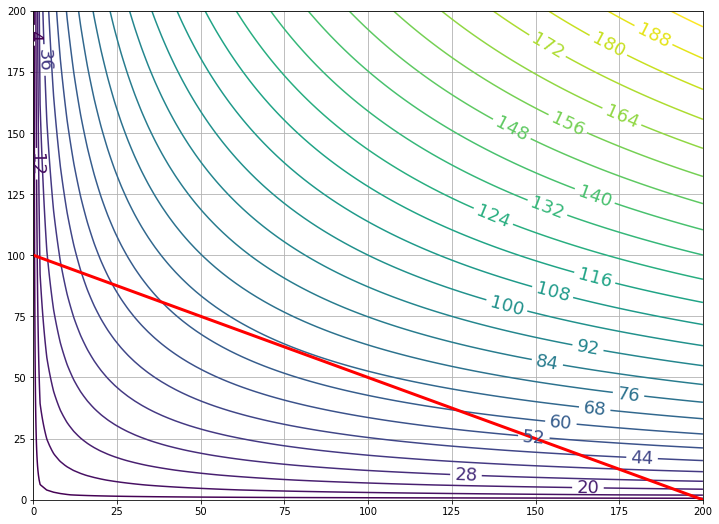

In [87]:
x = y = np.linspace(0,200,100)
X,Y = np.meshgrid(x,y)
plt.grid(True)
cp = plt.contour(X,Y,X**.4*Y**.6,levels=np.arange(4,200,8))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(x,100 - x/2,'-r',lw=3);
# plt.ylim((-2,2));